## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(
/root/accesibilidad-urbana/aup/analysis.py:587: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  weights = 1.0 (dist + 1e-12)**power


### Notebook config - Input data Directories (Required)

In [2]:
# Location of area of interest (Required)
aoi_dir = "../../data/external/prox_latam/aoi_ags.gpkg"
# Location of points of interest (Required)
#pois_dir = "../../data/external/prox_latam/pois_ags.gpkg"

<Axes: >

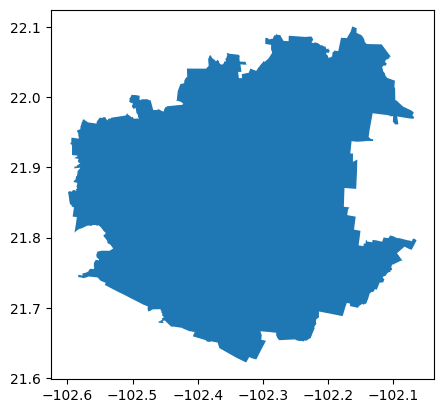

In [3]:
# Read area of interest (aoi)
aoi = gpd.read_file(aoi_dir)
aoi = aoi.to_crs("EPSG:4326")

# Show
aoi.plot()

### Trial of Function 1 once in Visual Studio Code:

In [4]:
G, nodes, edges = aup.create_osmnx_network(aoi,how='from_bbox',network_type='all_private')

Extracted min and max coordinates from the municipality. Polygon N:22.10033, S:21.62227, E-102.06451, W-102.59887.
Created OSMnx graph from bounding box.
Converted OSMnx graph to 60233 nodes and 142263 edges GeoDataFrame.
Filtered columns.
Column: osmid in nodes gdf, has a list in it, the column data was converted to string.
Column: lanes in nodes gdf, has a list in it, the column data was converted to string.
Column: name in nodes gdf, has a list in it, the column data was converted to string.
Column: highway in nodes gdf, has a list in it, the column data was converted to string.
Column: maxspeed in nodes gdf, has a list in it, the column data was converted to string.
Column: ref in nodes gdf, has a list in it, the column data was converted to string.


## Function 1: Creates OSMnx network (G, nodes and edges)

In [17]:
def create_osmnx_network(aoi, how='from_polygon', network_type='all_private'):
    
    # Set crs of area of interest
    aoi = aoi.to_crs("EPSG:4326")
    
    if how == 'from_bbox':
        # Read area of interest as a polygon geometry
        poly = aoi.geometry
        
        # Extracts coordinates from polygon as DataFrame
        coord_val = poly.bounds

        # Gets coordinates for bounding box
        n = coord_val.maxy.max()
        s = coord_val.miny.min()
        e = coord_val.maxx.max()
        w = coord_val.minx.min()

        print(f"Extracted min and max coordinates from the municipality. Polygon N:{round(n,5)}, S:{round(s,5)}, E{round(e,5)}, W{round(w,5)}.")

        # Downloads OSMnx graph from bounding box
        G = ox.graph_from_bbox(n, s, e, w,
                               network_type=network_type,
                               simplify=True,
                               retain_all=False,
                               truncate_by_edge=False)

        print("Created OSMnx graph from bounding box.")

    elif how == 'from_polygon':        
        # Downloads OSMnx graph from bounding box
        G = ox.graph_from_polygon(aoi.unary_union,
                                  network_type=network_type,
                                  simplify=True,
                                  retain_all=False,
                                  truncate_by_edge=False)

        print("Created OSMnx graph from bounding polygon.")

    else:
        print("Invalid argument 'how'.")

    #Transforms graph to nodes and edges Geodataframe
    nodes, edges = ox.graph_to_gdfs(G)

    #Resets index to access osmid as a column
    nodes.reset_index(inplace=True)

    #Resets index to acces u and v as columns
    edges.reset_index(inplace=True)

    print(f"Converted OSMnx graph to {len(nodes)} nodes and {len(edges)} edges GeoDataFrame.")

    # Defines columns of interest for nodes and edges
    nodes_columns = ["osmid", "x", "y", "street_count", "geometry"]
    edges_columns = [
        "osmid",
        "v",
        "u",
        "key",
        "oneway",
        "lanes",
        "name",
        "highway",
        "maxspeed",
        "length",
        "geometry",
        "bridge",
        "ref",
        "junction",
        "tunnel",
        "access",
        "width",
        "service",
    ]

    # if column doesn't exist it creates it as nan
    for c in nodes_columns:
        if c not in nodes.columns:
            nodes[c] = np.nan
            print(f"Added column {c} for nodes.")

    for c in edges_columns:
        if c not in edges.columns:
            edges[c] = np.nan
            print(f"Added column {c} for edges.")

    # Filters GeoDataFrames for relevant columns
    nodes = nodes[nodes_columns]
    edges = edges[edges_columns]
    print("Filtered columns.")

    # Converts columns with lists to strings to allow saving to local and further processes.
    for col in nodes.columns:
        if any(isinstance(val, list) for val in nodes[col]):
            nodes[col] = nodes[col].astype('string')
            print(f"Column: {col} in nodes gdf, has a list in it, the column data was converted to string.")

    for col in edges.columns:
        if any(isinstance(val, list) for val in edges[col]):
            edges[col] = edges[col].astype('string')
            print(f"Column: {col} in nodes gdf, has a list in it, the column data was converted to string.")

    return G,nodes,edges

In [18]:
G,nodes,edges = create_osmnx_network(aoi, how='from_bbox', network_type='all_private')

Extracted min and max coordinates from the municipality. Polygon N:22.10033, S:21.62227, E-102.06451, W-102.59887.


Exception ignored in: <function Collection.__del__ at 0x7f1e2acbf1c0>
Traceback (most recent call last):
  File "/usr/local/python/lib/python3.10/site-packages/fiona/collection.py", line 693, in __del__
    def __del__(self):
KeyboardInterrupt: 


Created OSMnx graph from bounding box.
Converted OSMnx graph to 60233 nodes and 142263 edges GeoDataFrame.
Filtered columns.
Column: osmid in nodes gdf, has a list in it, the column data was converted to string.
Column: lanes in nodes gdf, has a list in it, the column data was converted to string.
Column: name in nodes gdf, has a list in it, the column data was converted to string.
Column: highway in nodes gdf, has a list in it, the column data was converted to string.
Column: maxspeed in nodes gdf, has a list in it, the column data was converted to string.
Column: ref in nodes gdf, has a list in it, the column data was converted to string.


In [14]:
nodes_save_dir = '../../data/external/temporal_fromjupyter/01_nodes_unary_union.gpkg'
edges_save_dir = '../../data/external/temporal_fromjupyter/01_edges_unary_union.gpkg'

nodes.to_file(nodes_save_dir, driver='GPKG')
edges.to_file(edges_save_dir, driver='GPKG')

## Function 2 - Creates a popdata hexgrid containing total population in especified resolutions

### Trial of Function 2 once in Visual Studio Code:

In [4]:
pop_dir = "../../data/external/prox_latam/pop_gdf_ags.gpkg"
index_column = 'cvegeo'
pop_columns = ['pobtot','p_0a2','p_3a5','p_60ymas']
res_list = [8,9]
hex_socio_gdf = aup.create_popdata_hexgrid(aoi,pop_dir,index_column,pop_columns,res_list)

Filtered pop_gdf.
Extracted pop_gdf centroids.
Converted to centroids with 1043905 pop vs 1043905 pop in original gdf.
Created hex_grid with 8 resolution
Agregated socio data to hex with a total of 1043905.0 population for resolution 8.
Calculated an average density of 39.75306755993063
Created hex_grid with 9 resolution
Agregated socio data to hex with a total of 1043905.0 population for resolution 9.
Calculated an average density of 57.50817597082861
Finished calculating population by hexgrid for res [8, 9].


### Original Function 2

In [21]:
def create_popdata_hexgrid(aoi,pop_dir,pop_column,pop_index_column,res_list):
    
    # Read pop GeoDataFrame
    pop_gdf = gpd.read_file(pop_dir)
    
    # Format and isolate data of interest
    pop_gdf = pop_gdf.to_crs("EPSG:4326")
    pop_gdf.columns = pop_gdf.columns.str.lower()
    block_pop = pop_gdf[[pop_index_column,pop_column,'geometry']]

    # Extract point from polygon
    block_pop = block_pop.to_crs("EPSG:6372")
    block_pop = block_pop.set_index(pop_index_column)
    point_within_polygon = gpd.GeoDataFrame(geometry=block_pop.representative_point())

    # Add census data to points
    centroid_block_pop = point_within_polygon.merge(block_pop, right_index=True, left_index=True) 

    # Format centroids with pop data
    # Format geometry column
    centroid_block_pop.drop(columns=['geometry_y'], inplace=True)
    centroid_block_pop.rename(columns={'geometry_x':'geometry'}, inplace=True)
    # Create GeoDataFrame with that geometry column
    centroid_block_pop = gpd.GeoDataFrame(centroid_block_pop, geometry='geometry')
    # Format population column
    centroid_block_pop.rename(columns={pop_column:'pobtot'},inplace=True)
    # General final formatting
    centroid_block_pop = centroid_block_pop.to_crs("EPSG:4326")
    centroid_block_pop = centroid_block_pop.reset_index()

    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Converted to centroids with {centroid_block_pop.pobtot.sum()} " + f"pop vs {block_pop.pobtot.sum()} pop in original gdf.")
    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # create buffer for aoi to include outer blocks when creating hexgrid
    aoi_buffer = aoi.copy()
    aoi_buffer = aoi_buffer.dissolve()
    aoi_buffer = aoi_buffer.to_crs("EPSG:6372").buffer(2500)
    aoi_buffer = gpd.GeoDataFrame(geometry=aoi_buffer)
    aoi_buffer = aoi_buffer.to_crs("EPSG:4326")

    hex_socio_gdf = gpd.GeoDataFrame()

    for res in res_list:
        # Generate hexagon gdf
        hex_gdf = aup.create_hexgrid(aoi_buffer, res)
        hex_gdf = hex_gdf.set_crs("EPSG:4326")

        # Format - Remove res from index name and add column with res
        hex_gdf.rename(columns={f'hex_id_{res}':'hex_id'},inplace=True)
        hex_gdf['res'] = res
        #-----------------------------------------------------------------------------------------------------------------------------------------------------
        print(f"Created hex_grid with {res} resolution")
        #-----------------------------------------------------------------------------------------------------------------------------------------------------    
        # Group pop data
        # def socio_points_to_polygon(gdf_polygon,gdf_socio,cve_column,string_columns,wgt_dict=None,avg_column=None):
        # Agruments:
            #gdf_polygon (geopandas.GeoDataFrame): GeoDataFrame polygon where sociodemographic data will be grouped
            #gdf_socio (geopandas.GeoDataFrame): GeoDataFrame points with sociodemographic data
            #cve_column (str): Column name with polygon id in gdf_polygon.
            #string_columns (list): List with column names for string data in gdf_socio.
            #wgt_dict {dict, optional): Dictionary with average column names and weight column names for weighted average. Defaults to None.
            #avg_column (list, optional): List with column names with average data. Defaults to None.

        string_columns = [pop_index_column]
        hex_socio_df = aup.socio_points_to_polygon(hex_gdf, centroid_block_pop,'hex_id', string_columns)

        #-----------------------------------------------------------------------------------------------------------------------------------------------------     
        print(f"Agregated socio data to hex with a total of {hex_socio_df.pobtot.sum()} population for resolution {res}.")
        #----------------------------------------------------------------------------------------------------------------------------------------------------- 

        # Hexagons to GeoDataFrame
        hex_socio_gdf_tmp = hex_gdf.merge(hex_socio_df, on='hex_id')

        hectares = hex_socio_gdf_tmp.to_crs("EPSG:6372").area / 10000
        hex_socio_gdf_tmp['dens_pob_ha'] = hex_socio_gdf_tmp['pobtot'] / hectares

        #-----------------------------------------------------------------------------------------------------------------------------------------------------    
        print(f"Calculated an average density of {hex_socio_gdf_tmp.dens_pob_ha.mean()}")
        #-----------------------------------------------------------------------------------------------------------------------------------------------------
        
        # Concatenate in hex_socio_gdf, where (if more resolutions) next resolution will also be stored.
        hex_socio_gdf = pd.concat([hex_socio_gdf,hex_socio_gdf_tmp])    

    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Finished calculating population by hexgrid for res {res_list}.")
    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    
    return hex_socio_gdf

In [7]:
# Resolutions of hexgrid output
res_list = [8,9]
# Location of pop data file (Optional, if pop_output = True)
pop_dir = "../../data/external/prox_latam/pop_gdf_ags.gpkg"
# Insert name of column with pop data (Optional, if pop_output = True)
pop_column = 'pobtot'
# Insert name of pop gdf index column (Optional, if pop_output = True)
pop_index_column = 'cvegeo'

In [22]:
hex_socio_gdf = create_popdata_hexgrid(aoi,pop_dir,pop_column,pop_index_column,res_list)

Converted to centroids with 1043905 pop vs 1043905 pop in original gdf.
Created hex_grid with 8 resolution
Agregated socio data to hex with a total of 1043905.0 population for resolution 8.
Calculated an average density of 39.75306755993063
Created hex_grid with 9 resolution
Agregated socio data to hex with a total of 1043905.0 population for resolution 9.
Calculated an average density of 57.50817597082861
Finished calculating population by hexgrid for res [8, 9].


### Expanded version of function 2

In [34]:
def create_popdata_hexgrid(aoi,pop_dir,index_column,pop_columns,res_list):
    
    # Read pop GeoDataFrame
    pop_gdf = gpd.read_file(pop_dir)
    
    # Format and isolate data of interest
    pop_gdf = pop_gdf.to_crs("EPSG:4326")
    pop_gdf.columns = pop_gdf.columns.str.lower()
    
    # Set columns of interest
    columns_ofinterest = pop_columns.copy()
    columns_ofinterest.append(index_column)
    columns_ofinterest.append('geometry')
    block_pop = pop_gdf[columns_ofinterest]

    # Extract point from polygon
    block_pop = block_pop.to_crs("EPSG:6372")
    block_pop = block_pop.set_index(index_column)
    point_within_polygon = gpd.GeoDataFrame(geometry=block_pop.representative_point())

    # Add census data to points
    centroid_block_pop = point_within_polygon.merge(block_pop, right_index=True, left_index=True) 

    # Format centroids with pop data
    # Format geometry column
    centroid_block_pop.drop(columns=['geometry_y'], inplace=True)
    centroid_block_pop.rename(columns={'geometry_x':'geometry'}, inplace=True)
    # Create GeoDataFrame with that geometry column
    centroid_block_pop = gpd.GeoDataFrame(centroid_block_pop, geometry='geometry')
    # Format population column
    centroid_block_pop.rename(columns={pop_columns[0]:'pobtot'},inplace=True)
    # General final formatting
    centroid_block_pop = centroid_block_pop.to_crs("EPSG:4326")
    centroid_block_pop = centroid_block_pop.reset_index()
    
    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Converted to centroids with {centroid_block_pop.pobtot.sum()} " + f"pop vs {block_pop[pop_columns[0]].sum()} pop in original gdf.")
    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # Create buffer for aoi to include outer blocks when creating hexgrid
    aoi_buffer = aoi.copy()
    aoi_buffer = aoi_buffer.dissolve()
    aoi_buffer = aoi_buffer.to_crs("EPSG:6372").buffer(2500)
    aoi_buffer = gpd.GeoDataFrame(geometry=aoi_buffer)
    aoi_buffer = aoi_buffer.to_crs("EPSG:4326")

    hex_socio_gdf = gpd.GeoDataFrame()

    for res in res_list:
        # Generate hexagon gdf
        hex_gdf = aup.create_hexgrid(aoi_buffer, res)
        hex_gdf = hex_gdf.set_crs("EPSG:4326")

        # Format - Remove res from index name and add column with res
        hex_gdf.rename(columns={f'hex_id_{res}':'hex_id'},inplace=True)
        hex_gdf['res'] = res
        #-----------------------------------------------------------------------------------------------------------------------------------------------------
        print(f"Created hex_grid with {res} resolution")
        #-----------------------------------------------------------------------------------------------------------------------------------------------------    
        # Group pop data
        # def socio_points_to_polygon(gdf_polygon,gdf_socio,cve_column,string_columns,wgt_dict=None,avg_column=None):
        # Agruments:
            #gdf_polygon (geopandas.GeoDataFrame): GeoDataFrame polygon where sociodemographic data will be grouped
            #gdf_socio (geopandas.GeoDataFrame): GeoDataFrame points with sociodemographic data
            #cve_column (str): Column name with polygon id in gdf_polygon.
            #string_columns (list): List with column names for string data in gdf_socio.
            #wgt_dict {dict, optional): Dictionary with average column names and weight column names for weighted average. Defaults to None.
            #avg_column (list, optional): List with column names with average data. Defaults to None.
        string_columns = [index_column]
        hex_socio_df = aup.socio_points_to_polygon(hex_gdf, centroid_block_pop,'hex_id', string_columns)

        #-----------------------------------------------------------------------------------------------------------------------------------------------------     
        print(f"Agregated socio data to hex with a total of {hex_socio_df.pobtot.sum()} population for resolution {res}.")
        #----------------------------------------------------------------------------------------------------------------------------------------------------- 

        # Hexagons data to hex_gdf GeoDataFrame
        hex_socio_gdf_tmp = hex_gdf.merge(hex_socio_df, on='hex_id')
       
        # Calculate population density
        hectares = hex_socio_gdf_tmp.to_crs("EPSG:6372").area / 10000
        hex_socio_gdf_tmp['dens_pob_ha'] = hex_socio_gdf_tmp['pobtot'] / hectares

        #-----------------------------------------------------------------------------------------------------------------------------------------------------    
        print(f"Calculated an average density of {hex_socio_gdf_tmp.dens_pob_ha.mean()}")
        #-----------------------------------------------------------------------------------------------------------------------------------------------------
        
        # Concatenate in hex_socio_gdf, where (if more resolutions) next resolution will also be stored.
        hex_socio_gdf = pd.concat([hex_socio_gdf,hex_socio_gdf_tmp])    

    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Finished calculating population by hexgrid for res {res_list}.")
    #---------------------------------------------------------------------------------------------------------------------------------------------------------
    
    return hex_socio_gdf

In [2]:
pop_dir = "../../data/external/prox_latam/pop_gdf_ags.gpkg"
index_column = 'cvegeo'
pop_columns = ['pobtot','p_0a2','p_3a5','p_60ymas']
res_list = [8,9]

hex_socio_gdf = create_popdata_hexgrid(aoi,pop_dir,index_column,pop_columns,res_list)

NameError: name 'create_popdata_hexgrid' is not defined

In [36]:
hex_socio_gdf.head(2)

,hex_id,geometry,res,pobtot,p_0a2,p_3a5,p_60ymas,dens_pob_ha
0,88498e35d9fffff,"POLYGON ((-102.24057 21.97733, -102.23598 21.9...",8,47.0,0.0,0.0,0.0,0.544121
1,88498e341dfffff,"POLYGON ((-102.25696 21.94442, -102.25237 21.9...",8,2237.0,212.0,168.0,37.0,25.897283


In [37]:
prueba = hex_socio_gdf.loc[hex_socio_gdf.hex_id == '88498e34e1fffff']
prueba

,hex_id,geometry,res,pobtot,p_0a2,p_3a5,p_60ymas,dens_pob_ha
299,88498e34e1fffff,"POLYGON ((-102.25996 21.97565, -102.25536 21.9...",8,103.0,3.0,14.0,4.0,1.192333


In [ ]:
pop_save_dir = '../../data/external/temporal_fromjupyter/04_hex_pop_concat.gpkg'

hex_socio_gdf.to_file(pop_save_dir, driver='GPKG')